In [1]:
import pandas as pd
import numpy as np
import matplotlib as map
from matplotlib import pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

In [2]:
df = pd.read_excel("data/regression_data.xls")

In [3]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
df = df.drop(columns=["id", "date"])

In [5]:
# Create binary target
df['high_value'] = (df['price'] >= 650000).astype(int)

# Check the split
print(df['high_value'].value_counts(normalize=True))

high_value
0    0.753577
1    0.246423
Name: proportion, dtype: float64


In [6]:
df["sqft_grade"] = df["sqft_living"] * df["grade"]

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare features (same ones you used for regression)
X = df.drop(columns=["high_value", "price", "sqft_above", "yr_built", "yr_renovated", "sqft_grade"])
y = df['high_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

# Feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df)

Accuracy: 0.927
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3277
           1       0.90      0.78      0.84      1043

    accuracy                           0.93      4320
   macro avg       0.92      0.88      0.89      4320
weighted avg       0.93      0.93      0.92      4320

          Feature  Importance
2     sqft_living    0.198674
8           grade    0.194809
11            lat    0.185709
13  sqft_living15    0.117087
1       bathrooms    0.057406
10        zipcode    0.041520
12           long    0.039783
3        sqft_lot    0.032297
14     sqft_lot15    0.032221
6            view    0.032097
9   sqft_basement    0.020699
0        bedrooms    0.017905
4          floors    0.014423
7       condition    0.012947
5      waterfront    0.002425


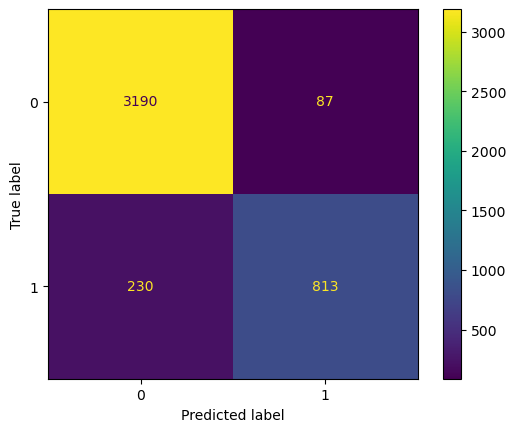

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns 
from matplotlib import pyplot as plt 

cm = confusion_matrix(y_test, y_pred)

df = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
df.plot()
plt.show()

